In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-churn-modelling/Churn_Modelling.csv
/kaggle/input/bank-churn/bank churn.png
/kaggle/input/bank-churn1/ss.png


# Business Understanng

Domain: The data appears to be related to banking or financial services, specifically focusing on customer information and their interactions with the bank. 

Business Understanding: The data could be used to analyze customer churn within the banking industry. By examining various customer attributes and behaviors, such as credit score, tenure, balance, number of products, and activity level, businesses can gain insights into factors that contribute to customer churn. Understanding the reasons behind customer churn can help banks identify areas for improvement in customer satisfaction, loyalty, and retention strategies. Additionally, the data could be used to build predictive models to forecast customer churn and develop targeted retention campaigns.

# Dataset Description

- RowNumber: A unique identifier for each row in the dataset.
- CustomerId: A unique identifier for each customer.
- Surname: The surname or last name of the customer.
- CreditScore: The credit score of the customer, which is a numerical value indicating creditworthiness.
- Geography: The geographic location or country of the customer.
- Gender: The gender of the customer (e.g., Male or Female).
- Age: The age of the customer in years.
- Tenure: The number of years the customer has been with the bank.
- Balance: The account balance of the customer.
- NumOfProducts: The number of bank products the customer has (e.g., accounts, loans, etc.).
- HasCrCard: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- IsActiveMember: Indicates whether the customer is an active member of the bank (1 = Yes, 0 = No).
- EstimatedSalary: The estimated salary of the customer.
- Exited: Indicates whether the customer has churned or left the bank (1 = Yes, 0 = No).

# Data Understaning

In [41]:
df=pd.read_csv('/kaggle/input/bank-churn-modelling/Churn_Modelling.csv')

In [42]:
df.shape

(10000, 14)

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no any null vaulues present in our dataset..Let's check for duplicates

In [45]:
df.duplicated().sum()

0

Lets check how many customers have left the bank

In [46]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

So we can see out of 10k customers 2037 have already left the bank services.

Now lets check the cloumn Geography ,how many categories are there?

In [47]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Removing irrelevant features 
We are not going to use first 3 columns that are RowNumber,CustomerID, and Surname as it may not be that much helpful to predict the output.

In [48]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)  ##inplace=True..To make changes permanant

In [49]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Now we will check Numerical and Ctegorical columns

In [50]:
# Get column data types
column_types = df.dtypes

print(column_types)# Separate numerical and categorical columns
numerical_columns = column_types[(column_types == 'int64') | (column_types == 'float64')].index
categorical_columns = column_types[(column_types == 'object') | (column_types == 'category')].index



CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [51]:
print("Numerical columns:")
print(numerical_columns)

print("Categorical columns:")
print(categorical_columns)


Numerical columns:
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Categorical columns:
Index(['Geography', 'Gender'], dtype='object')


In [52]:
### one hot encoding for categorical columns
df=pd.get_dummies(df,columns=['Geography', 'Gender'],drop_first=True)

 Here we should have to make all the numerical columns values on same scale. So we will apply standard scalar on it

In [53]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [54]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [55]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Object created

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test) 

In [58]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [59]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [60]:
#Importing libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [61]:
model=Sequential()  ## Creation of object of model

model.add(Dense(3,activation="sigmoid",input_dim=11))  ##input_dim=11 means 11 features we are passing to the Neural Network of first layer
model.add(Dense(1,activation="sigmoid")) ## second layer

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


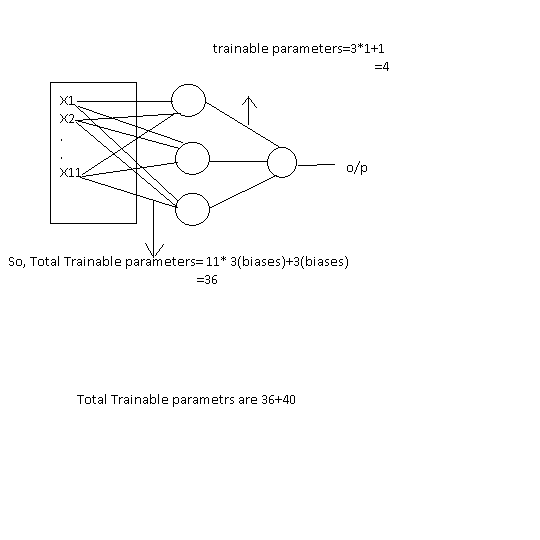

In [63]:
from PIL import Image
import IPython.display as display

# Set the path to your image
image_path = '/kaggle/input/bank-churn/bank churn.png'  
# Open the image file
image = Image.open(image_path)

# Display the image in the notebook
display.display(image)


# Model Compilation

Here we can define which loss fn we will use, which optizer will be used for Gradient decent.
here we since we have binary classification problem so our loss function will be binary-cross entropy(Logg loss) and we will use optimizer called "Adam". we can use any optimizer bt adam generally performs well so will this optimizer

In [64]:
model.compile(loss="binary_crossentropy", optimizer="Adam")

In [65]:
# Now we will fit our X_train_scaled data
model.fit(X_train_scaled,y_train, epochs=10)
## This is step where our Neural network will train

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5957
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5111
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4801
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4659
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4572
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4507
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4455
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4411
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4373
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4342


Here we would see our model has trained 10 times and on every epochs loss is decreasing

In [66]:
## Now we can see where the weights and biases values are stored
model.layers[0].get_weights()

[array([[ 0.38130125,  0.22269367,  0.00781974],
        [ 0.3740291 , -2.1022668 , -1.0891601 ],
        [ 0.02870572, -0.14004242,  0.11046562],
        [-0.04103681, -0.12150621, -0.46816766],
        [-0.12419572,  0.1869241 , -0.01155788],
        [-0.01550242,  0.0863288 ,  0.03980475],
        [ 0.07864783,  0.36472696,  0.8958159 ],
        [ 0.24288887,  0.10296036, -0.09652569],
        [-0.25125515, -0.404533  , -0.57624316],
        [ 0.4210834 , -0.00580191,  0.06374554],
        [-0.57862073,  0.20356189,  0.57399374]], dtype=float32),
 array([-0.21371   ,  0.13282403,  0.3658811 ], dtype=float32)]

here we can see 33 weights and 3 baises of first layer of neural network

In [67]:
model.layers[1].get_weights()

[array([[ 0.11982165],
        [-0.73005265],
        [-1.772233  ]], dtype=float32),
 array([-0.24032295], dtype=float32)]

And here we can see 3 weights and 1 baise of 2nd layer of neural network

In [68]:
## Now we will do predictions
y_log=model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 1ms/step


array([[0.12049446],
       [0.14817263],
       [0.14042811],
       ...,
       [0.07526891],
       [0.15169923],
       [0.3211834 ]], dtype=float32)

 here are our predictions, now what we can do is that ..we will convert this values in [0,1] how can we do this? by setting threshold value.for that we have to draw AUC-ROC curve to decide the thrshold value.

In [69]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

here is our models accuracy, i.e. 0.80..we can improve our models accuracy by doing some changes in neural network. what changes?
1. we can increase no of epochs like 100 or 1000 epochs ..it will take time
2. we can change activation function as "ReLu".
3. We can increase no of nodes in hidden layer.
4. we can increase no. of hidden layers(here we have 1)

Let's try to do this changes


In [84]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))  
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid")) ## second layer

Architecture will looks like:

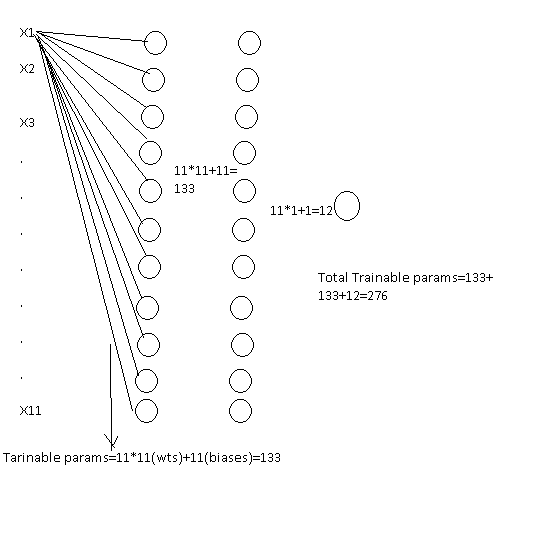

In [85]:
# Set the path to your image
image_path = '/kaggle/input/bank-churn2/ss.png'  
# Open the image file
image = Image.open(image_path)

# Display the image in the notebook
display.display(image)


In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 dense_17 (Dense)            (None, 11)                132       
                                                                 
 dense_18 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

now we will add new parameter called validation_split,e.g suppose we have 8k customers data, here validation_split=0.2 means we are sepearting 20% customers, now our model will run on (8000-20%customers) also it will test on this customer.

In [88]:
history=model.fit(X_train_scaled,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5911 - accuracy: 0.6986 - val_loss: 0.5066 - val_accuracy: 0.8006
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8034 - val_loss: 0.4513 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8139 - val_loss: 0.4210 - val_accuracy: 0.8194
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8275 - val_loss: 0.4028 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8395 - val_loss: 0.3867 - val_accuracy: 0.8413
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8466 - val_loss: 0.3746 - val_accuracy: 0.8450
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8511 - val_loss: 0.3675 - val_accuracy: 0.8456

In [90]:
y_log=model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 975us/step


array([[0.03496364],
       [0.08758289],
       [0.05702266],
       ...,
       [0.01034595],
       [0.07699912],
       [0.3029194 ]], dtype=float32)

In [91]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8665

Now you can see our accuracy has increased.   we will see our results in graphical format

In [ ]:
import matplotlib.pyplot as plt

In [93]:
history.history

{'loss': [0.5911352634429932,
  0.46712470054626465,
  0.42919161915779114,
  0.407754510641098,
  0.39120718836784363,
  0.3790118396282196,
  0.3697589039802551,
  0.36276787519454956,
  0.3576158881187439,
  0.35306233167648315,
  0.3499419689178467,
  0.3480246663093567,
  0.34534409642219543,
  0.3431456685066223,
  0.3416571021080017,
  0.34008193016052246,
  0.3392471969127655,
  0.3384900987148285,
  0.3373340368270874,
  0.33646130561828613,
  0.33590003848075867,
  0.3352302312850952,
  0.3342593312263489,
  0.3343757688999176,
  0.3335005044937134,
  0.3336208462715149,
  0.3332498073577881,
  0.33250635862350464,
  0.33228614926338196,
  0.3321484625339508,
  0.3323501646518707,
  0.3311103880405426,
  0.3312283754348755,
  0.33106398582458496,
  0.33103007078170776,
  0.3304980993270874,
  0.3308295011520386,
  0.33033618330955505,
  0.33007633686065674,
  0.3300466239452362,
  0.3292517066001892,
  0.32922059297561646,
  0.328894704580307,
  0.3284570574760437,
  0.328377

Here we will see one dictionary which has 4 key-value pairs
loss, accuracy,val_loss, val_accuracy 
it is all about training data

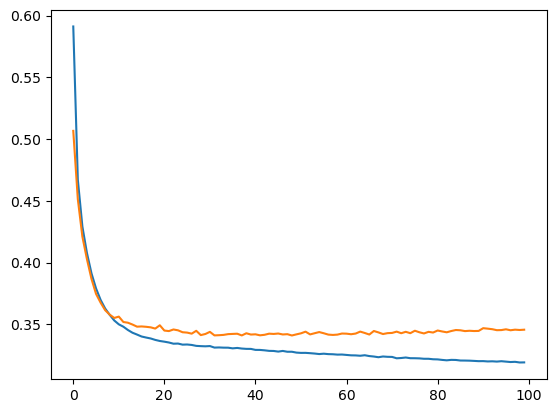

In [96]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

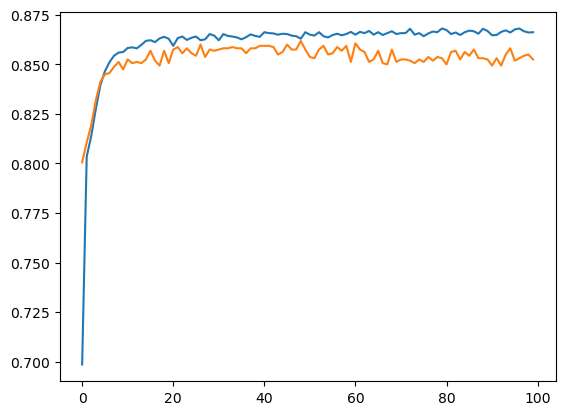

In [97]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

You can see here from epoch 1 to epoch 100 ,how our training error has decreased bt at some level there is overfitting, our taring loss and validation loss has some difference ,so to avoid this we should use some techniques called Regularization, Dropout.